<a href="https://colab.research.google.com/github/caangonz/FPCUP_WGA/blob/main/Day2_Clustering_Kmean_LVQ_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

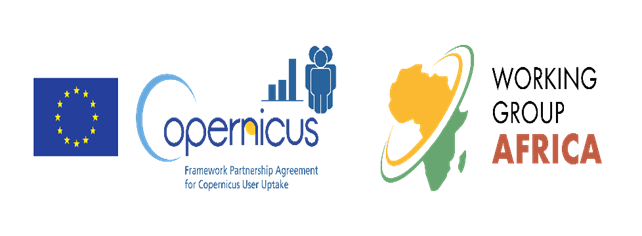

# **Day 2:  Unsupervised learning for Earth Observation data**

Carlos Gonzales-Inca
Department of Geography and Geology, University of Turku, Finland
email: cagoin@utu.fi

# Introduction

In this practical , you will use Unsupervise learning machine learning algoritms such as K-mean and LVQ (Learning Vector Quantization). These algorithms aims to partition n obervations (pixels) into k cluster, in which each pixels belongs to a cluster.

**Learning objectives:**

- Introduction to unsupervised learning
- Cluster analysis of image using K-means and LVQ algorithm
- Identify land use classes from clustered image

# Start GEE and Open EO data

In [ ]:
## Connect to Earth Engine
import ee

In [ ]:
ee.Authenticate()

In [ ]:
ee.Initialize()

In [ ]:
# Read the Cloudless mosaic you exported to GEE asset

my_img = ee.Image('projects/tanz-lc-1572859339356/assets/s2_mask3_mo') # Copy here YOUR IMAGE MOSAIC ID from GEE

In [ ]:
my_img

In [ ]:
# For interactive map visualization, use geemap package
#!pip install geemap
import geemap

In [ ]:
# Make map visualization
map = geemap.Map();
url = 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}' # Add google satellite image
map.add_tile_layer(url, name='Google Satellite', attribution='Google')
map.addLayer(my_img, {'bands': ['b11', 'b8', 'b2'], 'min': 0, 'max': 0.5}, "My img", False); #??
map.addLayerControl();
map

# Unsupervised clustering using Kmean methods

In [ ]:
# Create a radom samples
random_sampling = my_img.sample(**{
  'scale': 10,
  'numPixels': 1000
});

In [ ]:
# Method 1: K-Means Clustering
kmeans = ee.Clusterer.wekaKMeans(15).train(random_sampling);
clusters_kmeans = my_img.cluster(kmeans);

In [ ]:
clusters_kmeans

In [ ]:
map.addLayer(clusters_kmeans.randomVisualizer(),{},'Clusters kmean')
map

In [ ]:
# Methods 2: Optimized Kmean cluster number
# X-Means Clustering
xmeans = ee.Clusterer.wekaXMeans(5, 50).train(random_training); # min nro of cluster, max nro of cluster
cluster_xmeans = my_img.cluster(xmeans);

In [ ]:
cluster_xmeans

In [ ]:
map.addLayer(cluster_xmeans.randomVisualizer(),{},'Cluster Xmeans')
map

# Cluster classes identification

In [ ]:
# Identify each cluster land caover class
classx = cluster_xmeans.eq(8); # Revise each clustr values and identify the type of land cover

# Mask the land cover type by itself; pixel values equal to 0 become invalid.
classx2 = classx.selfMask();
map.addLayer(classx2,{'palette':'red'},'classx')
map

In [ ]:
# class 0 = water, new value = 1
# class 1 = water, new value = 1
# class 2 = water, new value = 1
# class 3 = water, new value = 1
# class 4 = water, new value = 1
# class 5 = water, new value = 1
.
.
# class 19 = water, new value = 1

In [ ]:
# Reclassify the cluster
old_class_values = ee.List.sequence(1,25)
#new_class_values = [1,1,1,1,1,x,x,...]

In [ ]:
old_class_values

In [ ]:
# Replace pixel values in the image using the ee "remap" function

re_class_xmean  = cluster_xmeans.remap(old_class_values,new_class_values)

In [ ]:
# Visualized your reclassfied clusters
map.addLayer(re_class_xmean,{},'re_class_xmean')
map

# Method 3: Learning Vector Quantization (LVQ) Clustering

In [ ]:
# ee.Clusterer.wekaLVQ(numClusters, learningRate, epochs, normalizeInput)

lvq = ee.Clusterer.wekaLVQ(15).train(random_training);
cluster_lvq = my_img.cluster(lvq);

In [ ]:
map.addLayer(cluster_lvq.randomVisualizer(),{},'Cluster lvq')
map

# Export your final clasified image